In [1]:
import pandas as  pd
import numpy as np

In [2]:
df = pd.read_csv("emails.csv")
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [3]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
df.sample(5)

,text,spam
4783,"Subject: followup patricia , i have forwarde...",0
5589,Subject: re : christmas basket list here is t...,0
1837,Subject: re : fw : stanford or - summer intern...,0
4310,Subject: re : anshuman srivastava thanks marg...,0
4770,"Subject: re : sharad update hi kate , firstl...",0


In [7]:
df.shape

(5728, 2)

***1.Data cleaning***

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [9]:
# missing values
df.isnull().sum()

text    0
spam    0
dtype: int64

In [10]:
# check for dupicate values
df.duplicated().sum()

33

In [11]:
# Removing Duplicates
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5695, 2)

***2.EDA***

In [14]:
df['text'].value_counts()

text
Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your

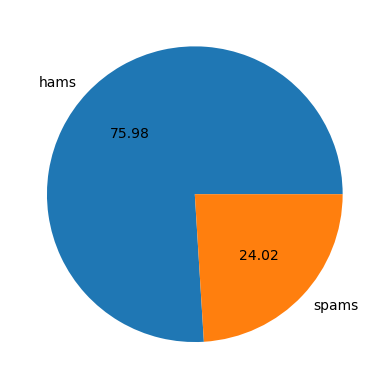

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['spam'].value_counts(), labels=['hams','spams'], autopct = "%0.2f")
plt.show()

In [16]:
# Data is imbalenced
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
if 'text' in df.columns:
        df['num_characters'] = df['text'].apply(len)

In [18]:
df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))
df['num_sents'] = df['text'].apply(lambda x: len(sent_tokenize(x)))
print(df[['num_words', 'num_characters', 'num_sents']].describe())


         num_words  num_characters    num_sents
count  5695.000000     5695.000000  5695.000000
mean    328.214047     1558.067076    19.462511
std     419.654234     2047.078711    35.981993
min       3.000000       13.000000     1.000000
25%     102.000000      508.500000     7.000000
50%     211.000000      979.000000    12.000000
75%     403.000000     1893.000000    22.000000
max    8479.000000    43952.000000  1565.000000


In [19]:
#hams
df[df['spam'] == 0][['num_words','num_characters','num_sents']].describe()

,num_words,num_characters,num_sents
count,4327.000000,4327.000000,4327.000000
mean,347.283799,1634.200139,19.838225
std,407.227757,1965.016383,38.124564
min,3.000000,13.000000,1.000000
25%,120.000000,577.500000,7.000000
50%,240.000000,1122.000000,13.000000
75%,440.500000,2037.500000,22.000000
max,8479.000000,43952.000000,1565.000000


In [20]:
#spams
df[df['spam'] == 1][['num_words','num_characters','num_sents']].describe()

,num_words,num_characters,num_sents
count,1368.000000,1368.000000,1368.000000
mean,267.896199,1317.257310,18.274123
std,451.623124,2271.372893,28.130434
min,5.000000,18.000000,1.000000
25%,80.000000,401.500000,6.000000
50%,141.000000,693.500000,11.000000
75%,252.000000,1250.250000,18.000000
max,6131.000000,28432.000000,438.000000


In [21]:
df.head()

,text,spam,num_characters,num_words,num_sents
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9


In [22]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

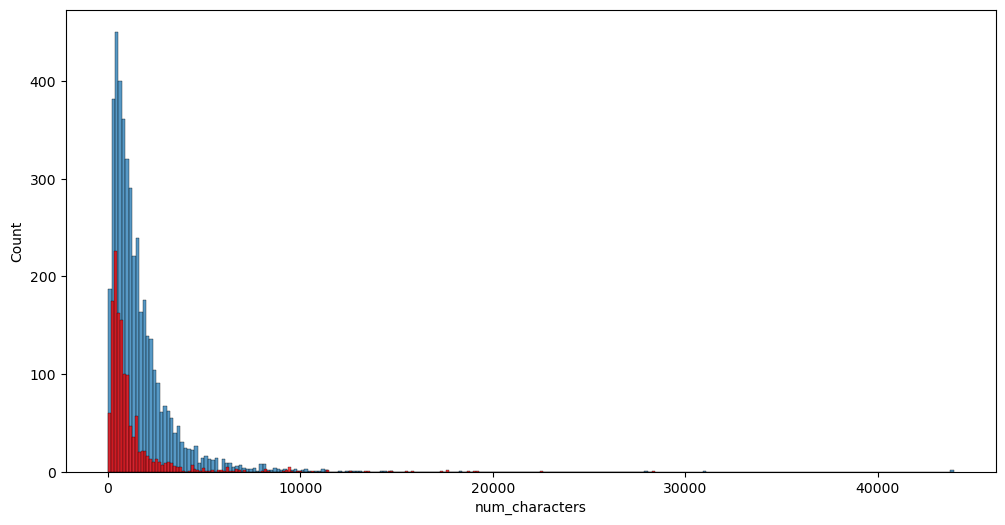

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 0]['num_characters'])
sns.histplot(df[df['spam'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_sents', ylabel='Count'>

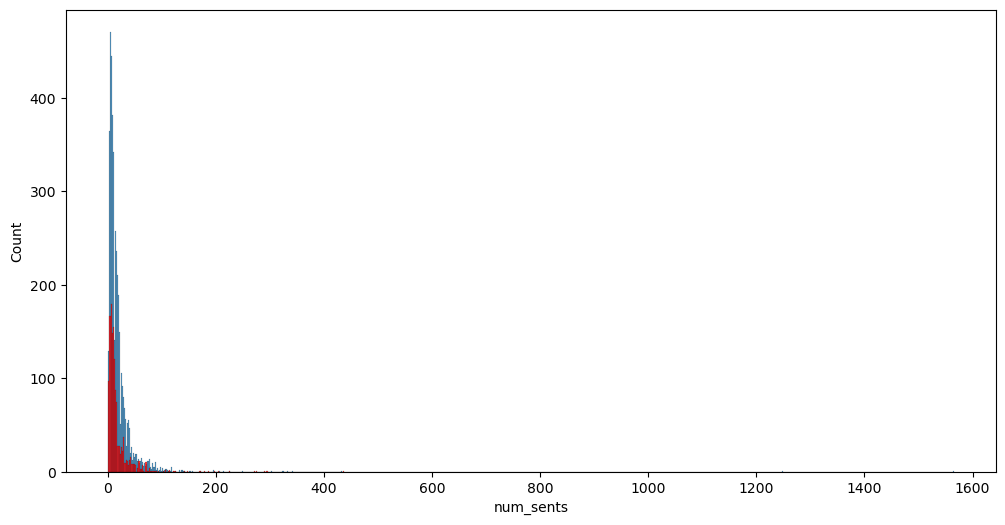

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 0]['num_sents'])
sns.histplot(df[df['spam'] == 1]['num_sents'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

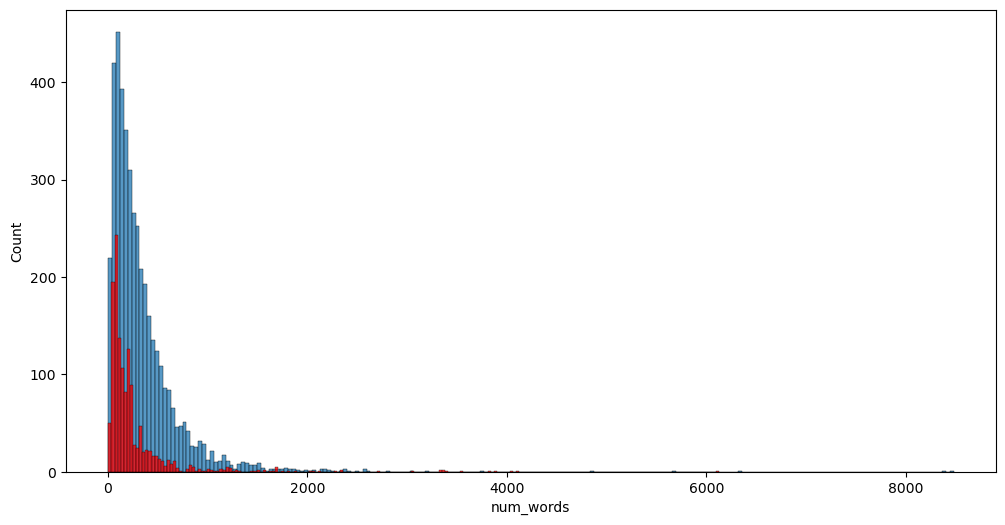

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 0]['num_words'])
sns.histplot(df[df['spam'] == 1]['num_words'], color = 'red')

C:\Users\ronit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


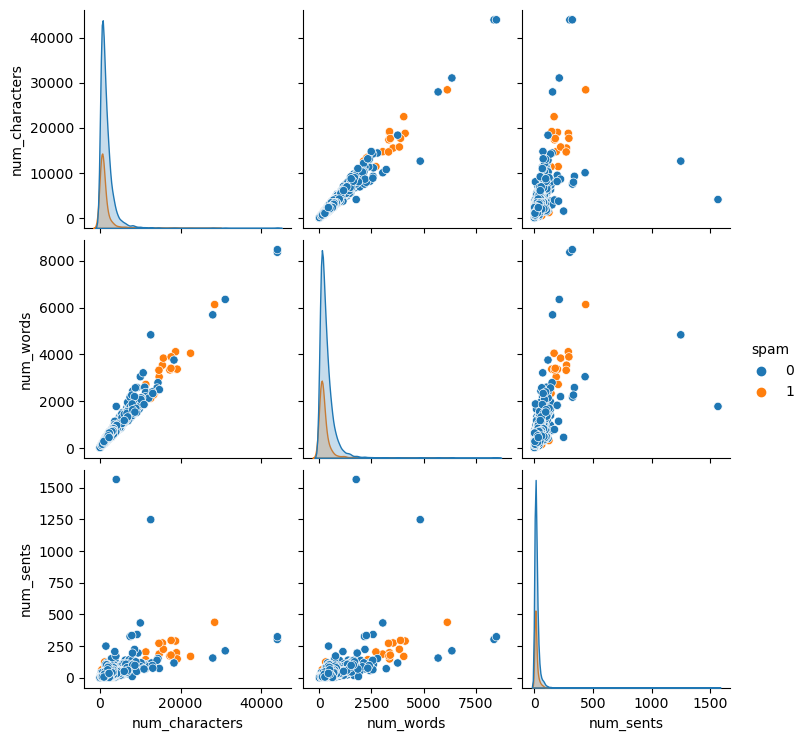

In [26]:
sns.pairplot(df, hue='spam')

In [27]:
df1 = df.drop(columns=['text'])
df1

,spam,num_characters,num_words,num_sents
0,1,1484,325,11
1,1,598,90,1
2,1,448,88,4
3,1,500,99,5
4,1,235,53,9
...,...,...,...,...
5723,0,1189,298,7
5724,0,1167,245,28
5725,0,2131,516,30
5726,0,1060,277,6


In [28]:
df1.corr()

,spam,num_characters,num_words,num_sents
spam,1.000000,-0.066150,-0.080824,-0.018572
num_characters,-0.066150,1.000000,0.986019,0.595728
num_words,-0.080824,0.986019,1.000000,0.660311
num_sents,-0.018572,0.595728,0.660311,1.000000


<Axes: >

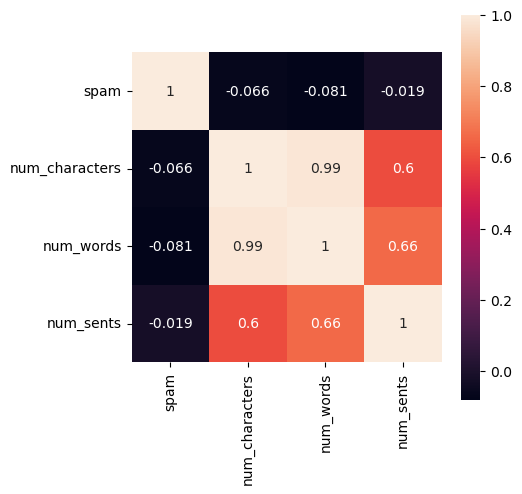

In [29]:
plt.figure(figsize=(5,5))
sns.heatmap(df1.corr(), annot=True, square=True)

***3. Data Processing***

In [30]:
from nltk.corpus import stopwords

In [31]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [33]:
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize text
    tokens = nltk.word_tokenize(text)

    # Remove non-alphanumeric tokens
    tokens = [token for token in tokens if token.isalnum()]

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]

    # Apply stemming
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in filtered_tokens]

    # Join and return the processed text
    return " ".join(stemmed_tokens)

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords

In [36]:
df['text']

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5695, dtype: object

In [37]:
df['text'].apply(transform_text)

0       subject natur irresist corpor ident lt realli ...
1       subject stock trade gunsling fanni merril muzo...
2       subject unbeliev new home made easi im want sh...
3       subject 4 color print special request addit in...
4       subject money get softwar cd softwar compat gr...
                              ...                        
5723    subject research develop charg gpg forward shi...
5724    subject receipt visit jim thank invit visit ls...
5725    subject enron case studi updat wow day super t...
5726    subject interest david pleas call shirley cren...
5727    subject news aurora 5 2 updat aurora version 5...
Name: text, Length: 5695, dtype: object

In [38]:
df.head()

,text,spam,num_characters,num_words,num_sents
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9


In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
!pip install wordcloud

In [41]:
from wordcloud import WordCloud

In [42]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [43]:
spams_wc = wc.generate(df[df['spam']==1]['transformed_text'].str.cat(sep=" "))

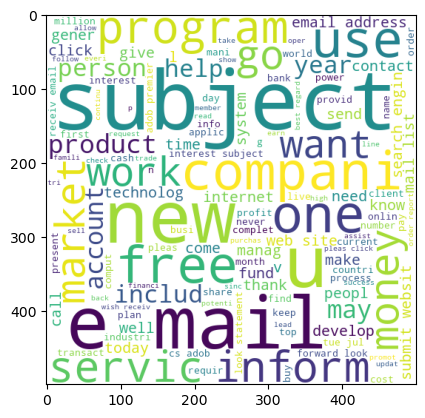

In [44]:
plt.imshow(spams_wc)

In [45]:
hams_wc = wc.generate(df[df['spam']==0]['transformed_text'].str.cat(sep=" "))

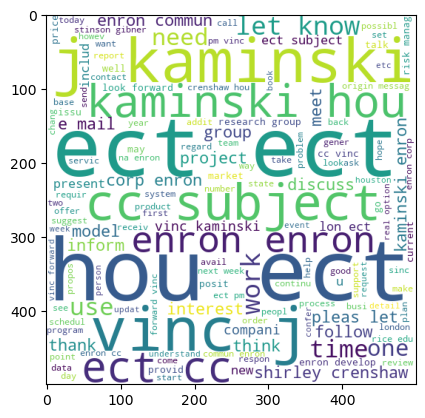

In [46]:
plt.imshow(hams_wc)

In [47]:
df[df['spam']==1]['transformed_text'].tolist()

['subject natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget 100 satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest',
 'subject stock trade gunsling fanni merril muzo colza attaind penultim like esmark perspicu rambl segovia group tri slung kansa tanzania ye chameleon continu clothesman libretto chesapeak tight waterway herald hawthorn lik

In [48]:
# Using list comprehensions for simplicity
spam_corpus = [
    word
    for msg in df[df['spam'] == 1]['transformed_text']
    for word in msg.split()
]


In [49]:
len(spam_corpus)

174630

In [50]:
from collections import Counter
Counter(spam_corpus)

Counter({'subject': 1577,
         'compani': 1065,
         'com': 1000,
         '1': 952,
         'mail': 917,
         'busi': 897,
         'email': 865,
         'inform': 818,
         'receiv': 727,
         'e': 701,
         'get': 694,
         '5': 687,
         'money': 662,
         'pleas': 619,
         '2': 613,
         'free': 606,
         '3': 604,
         'make': 603,
         'http': 603,
         'market': 600,
         'time': 593,
         'one': 592,
         '000': 560,
         'click': 552,
         'use': 546,
         'order': 541,
         'invest': 540,
         'us': 537,
         'offer': 528,
         'secur': 520,
         'report': 507,
         'websit': 506,
         'new': 504,
         'list': 503,
         'price': 503,
         'may': 489,
         'adob': 462,
         'address': 461,
         'site': 455,
         '0': 450,
         'messag': 445,
         'softwar': 440,
         'need': 438,
         'provid': 435,
         'account': 

In [51]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('subject', 1577),
 ('compani', 1065),
 ('com', 1000),
 ('1', 952),
 ('mail', 917),
 ('busi', 897),
 ('email', 865),
 ('inform', 818),
 ('receiv', 727),
 ('e', 701),
 ('get', 694),
 ('5', 687),
 ('money', 662),
 ('pleas', 619),
 ('2', 613),
 ('free', 606),
 ('3', 604),
 ('make', 603),
 ('http', 603),
 ('market', 600),
 ('time', 593),
 ('one', 592),
 ('000', 560),
 ('click', 552),
 ('use', 546),
 ('order', 541),
 ('invest', 540),
 ('us', 537),
 ('offer', 528),
 ('secur', 520)]

In [52]:
# Adding in dataframe
from collections import Counter
df2 = pd.DataFrame(Counter(spam_corpus).most_common(30))
df2

,0,1
0,subject,1577
1,compani,1065
2,com,1000
3,1,952
4,mail,917
5,busi,897
6,email,865
7,inform,818
8,receiv,727
9,e,701


In [53]:
df2 = df2.rename(columns={0:'Word',1:'Count'})
df2

,Word,Count
0,subject,1577
1,compani,1065
2,com,1000
3,1,952
4,mail,917
5,busi,897
6,email,865
7,inform,818
8,receiv,727
9,e,701


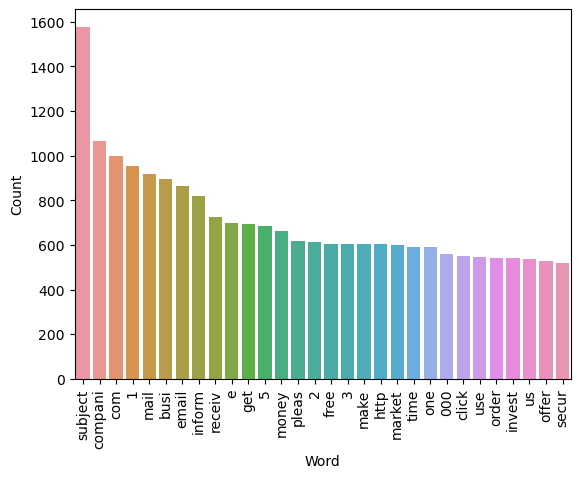

In [54]:
sns.barplot(x='Word', y='Count', data = df2)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['spam'], test_size=0.3, random_state=42)